In [1]:
#Importing Packages

%matplotlib inline
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns

In [3]:
data= pd.read_csv('clean_df.csv')

In [4]:
data.head()

,Unnamed: 0,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,29
1,1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,1
2,2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,1
3,3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,1,15
4,4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,1,6


In [5]:
del data['Unnamed: 0']

In [6]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,29
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,1
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,1
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,1,15
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,1,6


In [9]:
def features_plots(discrete_vars):
    
    plt.figure(figsize=(15,30))
    
    for i, cv in enumerate(['Age', 'AwaitingTime']): #Continious Variables
        plt.subplot(7, 2, i+1)
        plt.hist(data[cv], bins=len(data[cv].unique()))
        plt.title(cv)
        plt.ylabel('Frequency')
        
    for i, dv in enumerate(discrete_vars): #Discrete Variables
        plt.subplot(7, 2, i+3)
        data[dv].value_counts().plot(kind='bar', title=dv)
        plt.ylabel('Frequency')

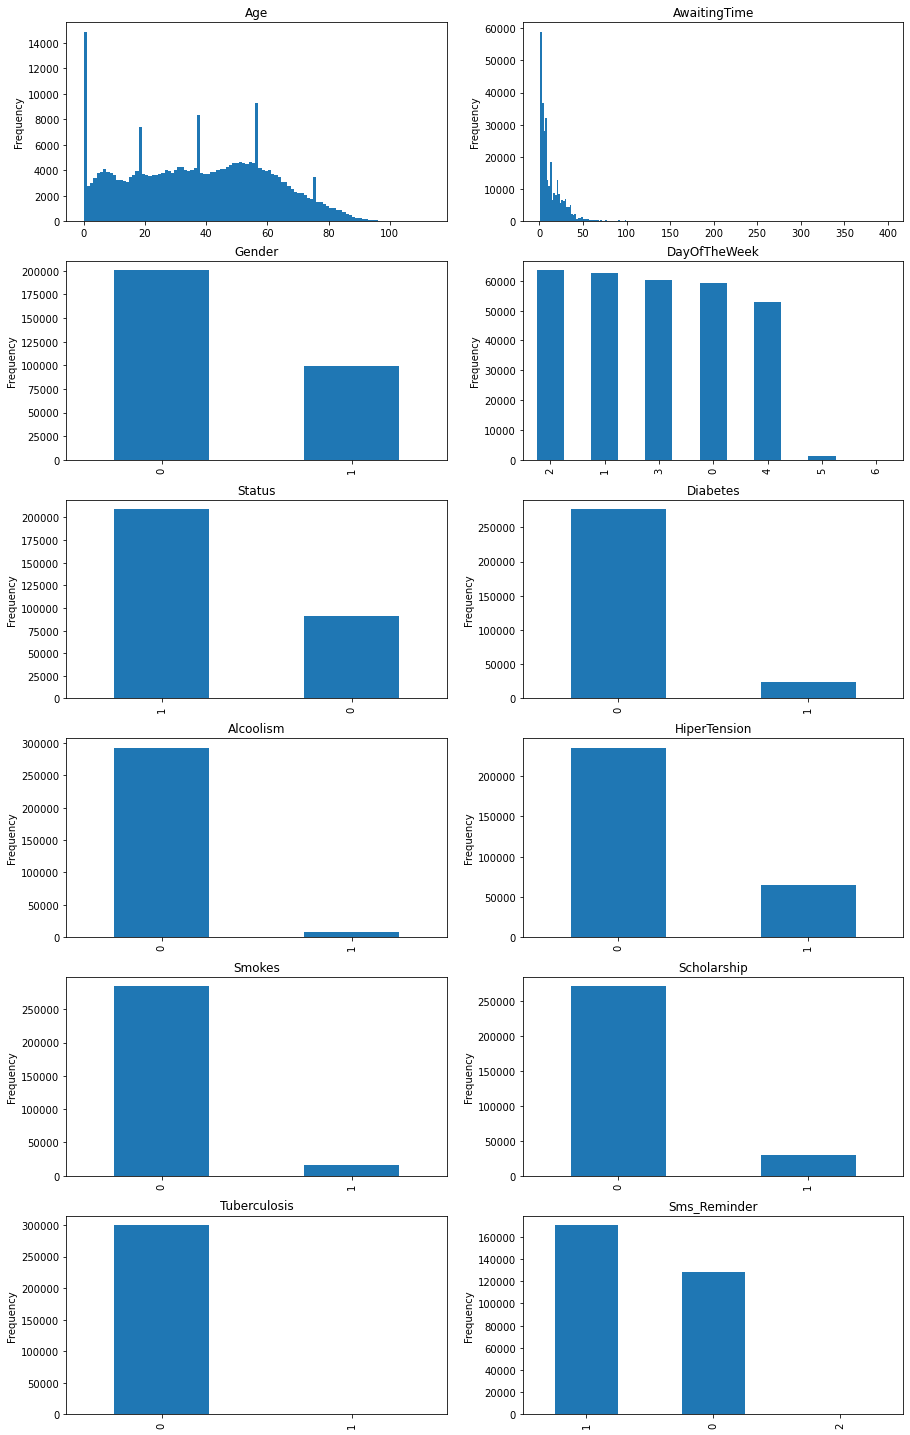

In [11]:
#plotting Features After Data Cleaning
discrete_vars = ['Gender', 'DayOfTheWeek', 'Status', 'Diabetes',
                 'Alcoolism', 'HiperTension', 'Smokes',
                 'Scholarship', 'Tuberculosis', 'Sms_Reminder']

features_plots(discrete_vars)

In [25]:
#Analyzing Status (target variable) on the basis of Sms_Reminder (Feature Variable)
#Both variables are categorical

cross_tab = pd.crosstab(data['Sms_Reminder'],data['Status'], margins = True)
print(cross_tab)

Status            0       1     All
Sms_Reminder                       
0             38915   89631  128546
1             51546  119103  170649
2               268     531     799
All           90729  209265  299994


## Effect on Status on the basis of Number of Sms Reminders to Patient



<AxesSubplot:xlabel='Sms_Reminder'>

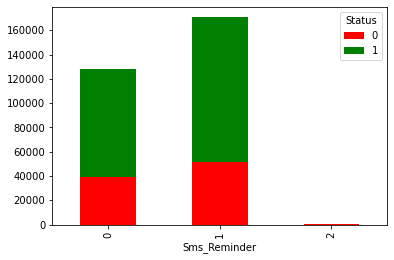

In [35]:
#Plotting Stacked bar chart

%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','green'], grid=False)

In [31]:
data.groupby(['Sms_Reminder', 'Status'])['Sms_Reminder'].count()

Sms_Reminder  Status
0             0          38915
              1          89631
1             0          51546
              1         119103
2             0            268
              1            531
Name: Sms_Reminder, dtype: int64

In [32]:
data.groupby(['Sms_Reminder', 'Status'])['Sms_Reminder'].count()/data.shape[0]

Sms_Reminder  Status
0             0         0.129719
              1         0.298776
1             0         0.171823
              1         0.397018
2             0         0.000893
              1         0.001770
Name: Sms_Reminder, dtype: float64

In [36]:
## Effect on Status on the basis of Appointment Day

cross_tab02 = pd.crosstab(data['DayOfTheWeek'],data['Status'], margins = True)

print(cross_tab02)

Status            0       1     All
DayOfTheWeek                       
0             19053   40244   59297
1             18148   44626   62774
2             18919   44576   63495
3             17850   42410   60260
4             16245   36524   52769
5               513     880    1393
6                 1       5       6
All           90729  209265  299994


<AxesSubplot:xlabel='DayOfTheWeek'>

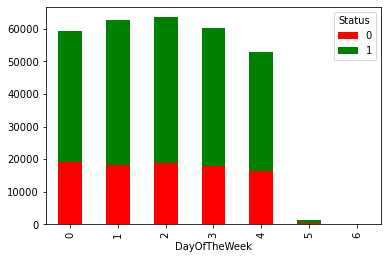

In [37]:
#Plotting Stacked bar chart

%matplotlib inline
cross_tab02.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','green'], grid=False)

<AxesSubplot:title={'center':'Age'}, xlabel='Status'>

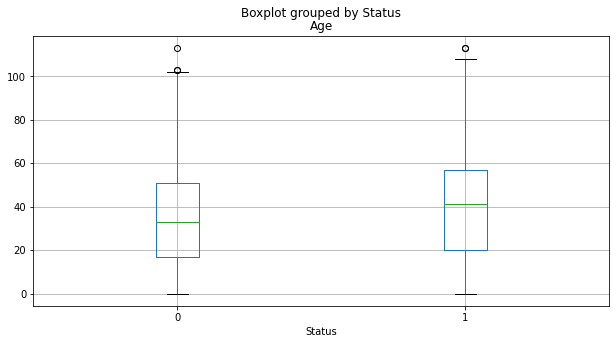

In [43]:
## Plotting Box Plot for Analyzing Age with respect to Status Variable

data.boxplot(column='Age',by='Status', figsize=( 10, 5))

In [44]:
data.groupby('Status')['Age'].mean()

Status
0    34.351244
1    39.307854
Name: Age, dtype: float64

In [45]:
data.groupby('Status')['Age'].median()

Status
0    33
1    41
Name: Age, dtype: int64